In [247]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [249]:
# 1. 사전학습 모델 불러오기
model = load_model('diabetes_cnn_model.keras')

In [251]:
# 2. 추가적인 층 및 출력층 추가하기
model.add(layers.Dense(32, activation='relu'))  # 추가적인 Dense 층
model.add(layers.Dense(1, activation='sigmoid'))  # 출력층 (이진 분류이므로 sigmoid 활성화 함수 사용)

In [253]:
# 3. 미세조정 (Fine-tuning)
# 사전학습된 모델의 일부 층을 고정하고, 새로운 층만 학습하도록 설정
for layer in model.layers[:-3]:  # 마지막 세 층을 제외한 나머지 층은 고정
    layer.trainable = False

In [255]:
# 4. 모델 재컴파일
# 학습률을 줄여서 모델이 안정적으로 학습되도록 설정
optimizer = Adam(learning_rate=0.0001)  # 학습률 감소
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [257]:
# 5. 학습 데이터로 모델 미세조정
history_fine_tune = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4154 - loss: 0.6888 - val_accuracy: 0.5514 - val_loss: 0.6908
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6126 - loss: 0.6877 - val_accuracy: 0.6636 - val_loss: 0.6895
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7124 - loss: 0.6862 - val_accuracy: 0.7196 - val_loss: 0.6882
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7705 - loss: 0.6855 - val_accuracy: 0.7664 - val_loss: 0.6870
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7600 - loss: 0.6847 - val_accuracy: 0.7477 - val_loss: 0.6858
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7917 - loss: 0.6839 - val_accuracy: 0.7664 - val_loss: 0.6848
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8358 - loss: 0.6824 - val_accuracy: 0.7944 - val_loss: 0.6836
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8162 - loss: 0.6816 - val_accuracy: 0.7944 - val_loss:

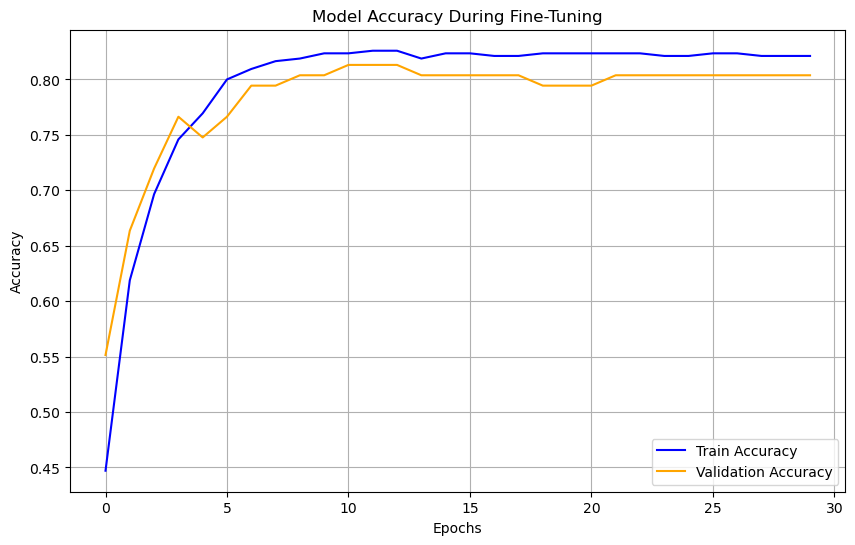

In [259]:
# 6. 학습 과정 시각화
plt.figure(figsize=(10, 6))
plt.plot(history_fine_tune.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy During Fine-Tuning')
plt.legend()
plt.grid(True)
plt.show()

In [261]:
# 7. 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy after fine-tuning: {test_acc}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8100 - loss: 0.6625
Test accuracy after fine-tuning: 0.8037382960319519
